In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Gamma and regularization:means protect the model from overfitting,gamma decided that how the model get deeper insigths the data points

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

convert it into dataFrame 

In [8]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target']=iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

chk the target values

In [13]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


Create a new column that are based on the other column like flowers name has a one target number so the new column based on it  

Understanding The Bias-Variance Tradeoff and Proper Validation Are Key to Building Useful Models

In [15]:
df['Flower Name']=df['target'].apply(lambda x:iris.target_names[x])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Seperate the dataframe by their names 

In [18]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

In [19]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


scater plot 

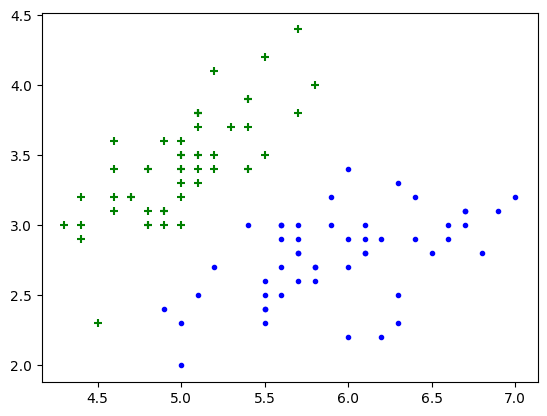

In [20]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue',marker='.')
#plt.scatter(df2['sepal length (cm)'],df2['sepal length (cm)'], color='red',marker='+')

Text(0, 0.5, 'petal width')

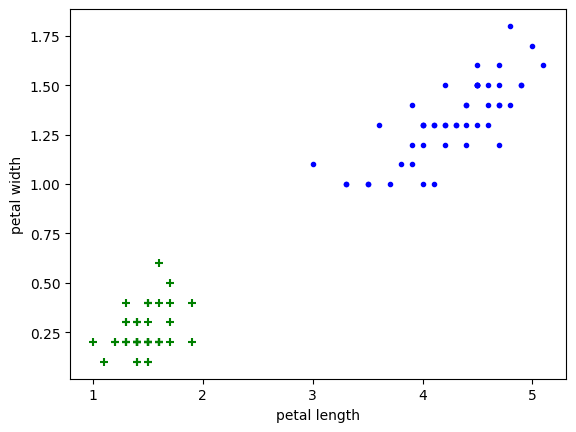

In [21]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
x=df.drop(['target','Flower Name'],axis=1)

In [25]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y=df['target']

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

Chk the percentage of traing and test set

In [29]:
len(x_train)

120

In [30]:
len(x_test)

30

In [31]:
from sklearn.svm import SVC

without parameters, 
with parameters,
gamma values,
kernal values,
regularization,

In [32]:
model=SVC(C=10)

C means regularization 

In [33]:
model.fit(x_train,y_train)

SVC(C=10)

Accuracy of the model

In [34]:
model.score(x_test,y_test)

1.0

Increase in regularization can increase the accuracy Value